## **Projeto 1**

Neste primeiro projeto utilizamos a base de dados Barcelona_accidentes no kaggle.com. 
Projeto consiste em diversas análises onde graficos/histogramas foram plotados conforme o andadomento da análise.

In [ ]:
# importanto os pacotes necessários para a realização da análise  dos dados

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
from plotly import __version__
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
from sklearn import preprocessing
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
# upload da base de dados accidents_2017
from google.colab import files
uploaded = files.upload()
acc = pd.read_csv('accidents_2017.csv')

Saving accidents_2017.csv to accidents_2017.csv


In [ ]:
acc.shape

(10339, 15)

In [ ]:
# como padrão, as 5 primerias informações (linhas) de cada coluna
acc.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [ ]:
# descrição dos dados, como exemplo a média
acc.describe()

,Day,Hour,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
count,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000
mean,15.775994,13.811394,1.154174,0.023310,1.178644,1.920979,2.162832,41.399346
std,8.763455,5.316490,0.742294,0.163803,0.735145,0.714011,0.024176,0.021251
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.091855,41.323094
25%,8.000000,10.000000,1.000000,0.000000,1.000000,2.000000,2.144985,41.386288
50%,16.000000,14.000000,1.000000,0.000000,1.000000,2.000000,2.163399,41.396730
75%,23.000000,18.000000,1.000000,0.000000,1.000000,2.000000,2.180179,41.411038
max,31.000000,23.000000,10.000000,4.000000,10.000000,14.000000,2.222572,41.468244


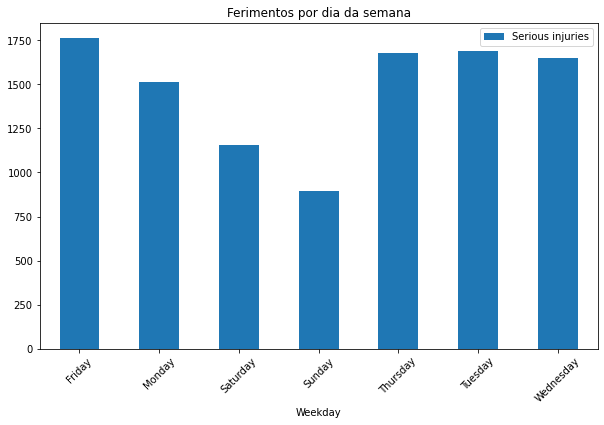

In [ ]:
# ferimentos conforme o dia da semana e quantidade
fg = acc[['Weekday', 'Serious injuries']].groupby('Weekday').count().plot.bar(figsize=(10,6), rot=45, title='Ferimentos por dia da semana')


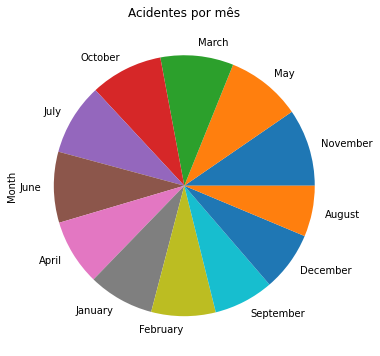

In [ ]:
# sobre a quantidade de acidente por mês
acc["Month"].value_counts().plot.pie(figsize=(10,6),title="Acidentes por mês")

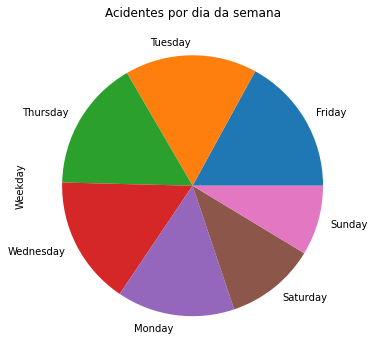

In [ ]:
# sobre a quantidade de acidente por dia da semana
acc["Weekday"].value_counts().plot.pie(figsize=(10,6),title="Acidentes por dia da semana")

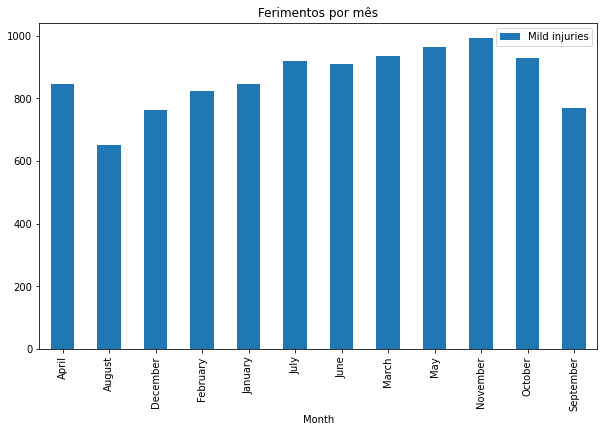

In [ ]:
# sobre a quantidade de ferimentos suaves por mês
gh = acc[['Month','Mild injuries']].groupby('Month').count().plot.bar(figsize=(10,6), title='Ferimentos por mês')

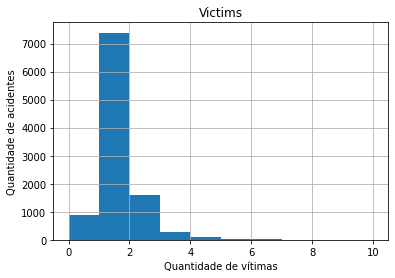

In [ ]:
# hist sobre a quantidade de vitimas vs acidentes
acc.hist(column ='Victims',bins = 10)
plt.xlabel('Quantidade de vítimas')
plt.ylabel('Quantidade de acidentes')
plt.show()

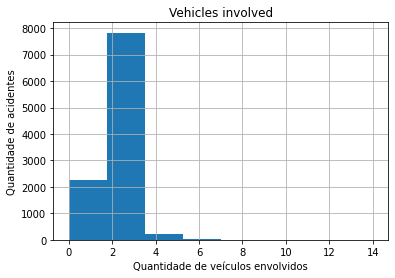

In [ ]:
# hist sobre os veiculos envolvidos vs quantidade de acidentes
acc.hist(column ='Vehicles involved',bins =8)
plt.xlabel('Quantidade de veículos envolvidos')
plt.ylabel('Quantidade de acidentes')
plt.show()

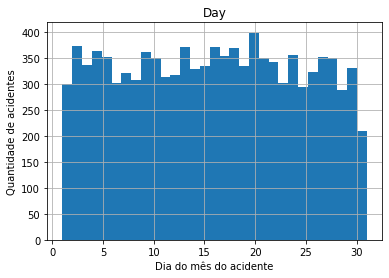

In [ ]:
# hist sobre a quantidade de acidentes pelo dia do mês
acc.hist(column ='Day',bins = 31)
plt.xlabel('Dia do mês do acidente')
plt.ylabel('Quantidade de acidentes')
plt.show()

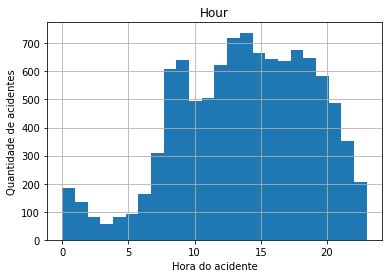

In [ ]:
# hist sobre a quantidade de acidentes conforme a hora
acc.hist(column ='Hour',bins = 24)
plt.xlabel('Hora do acidente')
plt.ylabel('Quantidade de acidentes')
plt.show()

In [ ]:
v = acc['Victims']
h = acc['Hour']

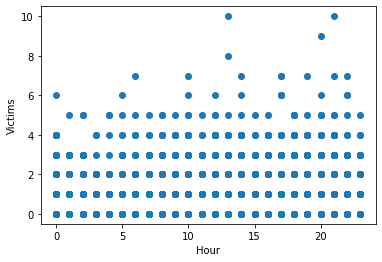

In [ ]:
# plot sobre a quantidade de vitimas vs a hora
plt.scatter(h,v)

plt.xlabel('Hour')
plt.ylabel('Victims')
plt.show()


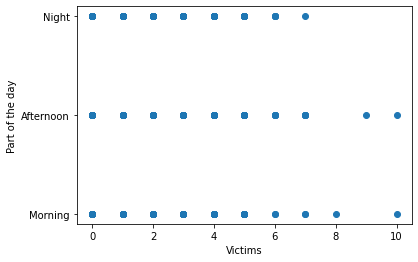

In [ ]:
# plot referente a quantidade de vitimas pelas partes de um dia ( manhã,tarde e noite)
v= acc['Victims']
pd = acc['Part of the day']

plt.scatter(v,pd)

plt.ylabel('Part of the day')
plt.xlabel('Victims')
plt.show()

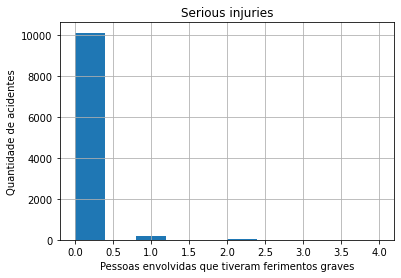

In [ ]:
# hist sobre os feridos gravemente pela quantidade de acidentes
acc.hist(column ='Serious injuries',bins = 10)
plt.xlabel('Pessoas envolvidas que tiveram ferimentos graves')
plt.ylabel('Quantidade de acidentes')
plt.show()

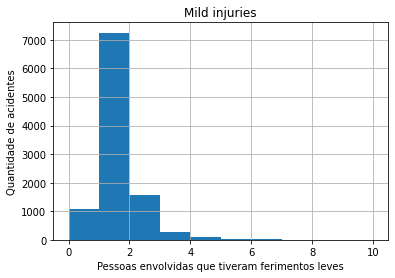

In [ ]:
# hist sobre os feridos pela quantidade de acidentes
acc.hist(column ='Mild injuries',bins =10)
plt.xlabel('Pessoas envolvidas que tiveram ferimentos leves')
plt.ylabel('Quantidade de acidentes')
plt.show()

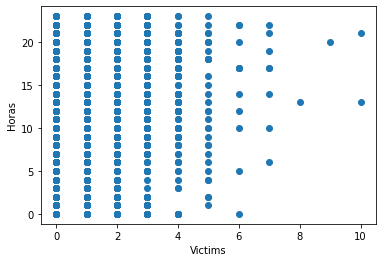

In [ ]:
# plot sobre a quantidade de vitimas conforme as horas
v = acc['Victims']
h = acc['Hour']

plt.scatter(v,h)
plt.xlabel('Victims')
plt.ylabel('Horas')
plt.show()

In [ ]:
# trocando os dias da semana por numeros 
acc['Weekday'] = acc['Weekday'].replace(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],[1,2,3,4,5,6,7])

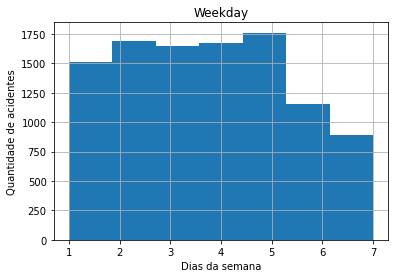

In [ ]:
acc.hist(column ='Weekday',bins =7)
plt.xlabel('Dias da semana')
plt.ylabel('Quantidade de acidentes')
plt.show()

In [ ]:
# trocando os meses por seus números correspondentes 
acc['Month'] = acc['Month'].replace(['January', 'February', 'March','April','May', 'June', 'July', 'August', 'September','October', 'November','December'],[1,2,3,4,5,6,7,8,9,10,11,12])

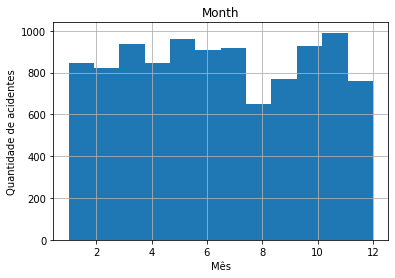

In [ ]:
acc.hist(column ='Month',bins =12)
plt.xlabel('Mês')
plt.ylabel('Quantidade de acidentes')
plt.show()

In [ ]:
# mudança no Weekday e Month
acc.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,5,10,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,5,9,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,5,12,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,5,7,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,4,5,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [ ]:
# as colunas contidades no arquivo
acc.columns

Index(['Id', 'District Name', 'Neighborhood Name', 'Street', 'Weekday',
       'Month', 'Day', 'Hour', 'Part of the day', 'Mild injuries',
       'Serious injuries', 'Victims', 'Vehicles involved', 'Longitude',
       'Latitude'],
      dtype='object')

In [ ]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 10339 non-null  object 
 1   District Name      10339 non-null  object 
 2   Neighborhood Name  10339 non-null  object 
 3   Street             10339 non-null  object 
 4   Weekday            10339 non-null  int64  
 5   Month              10339 non-null  int64  
 6   Day                10339 non-null  int64  
 7   Hour               10339 non-null  int64  
 8   Part of the day    10339 non-null  object 
 9   Mild injuries      10339 non-null  int64  
 10  Serious injuries   10339 non-null  int64  
 11  Victims            10339 non-null  int64  
 12  Vehicles involved  10339 non-null  int64  
 13  Longitude          10339 non-null  float64
 14  Latitude           10339 non-null  float64
dtypes: float64(2), int64(8), object(5)
memory usage: 1.2+ MB


In [ ]:
hour_day_data = acc[['Hour','Vehicles involved','Victims','Mild injuries','Serious injuries',]]
hour_day_data = hour_day_data.set_index('Hour')
hour_day_data = hour_day_data.groupby(level=[0]).sum()
hour_day_data = hour_day_data.sort_index()
hour_day_data.head()

,Vehicles involved,Victims,Mild injuries,Serious injuries
Hour,,,,
0,350,235,227,8
1,251,156,146,9
2,166,78,74,4
3,107,49,48,1
4,159,75,73,1


In [ ]:
part_day_data = acc[['Vehicles involved','Victims','Part of the day','Mild injuries','Serious injuries',]]
part_day_data = part_day_data.set_index('Part of the day')
part_day_data = part_day_data.groupby(level=[0]).sum()
part_day_data = part_day_data.sort_index()
part_day_data = part_day_data.reindex(['Morning','Afternoon','Night'])

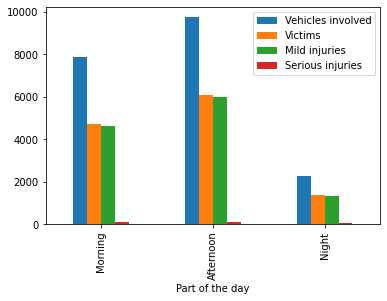

In [ ]:
# sobre os acidentes pelo andar do dia 
layout = dict(title='Accidents by part of the day',geo=dict(showframe=False))
part_day_data.plot.bar(layout=layout)

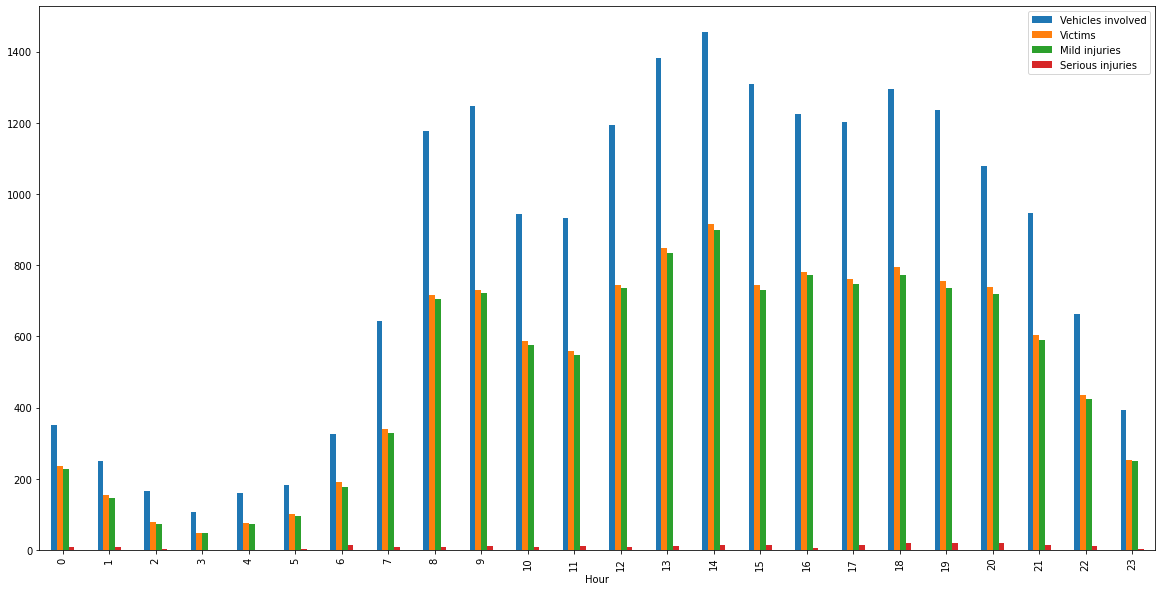

In [ ]:
# sobre os acidentes conforme a hora de cada dia 
layout = dict(title='Accidents by hour of the day',geo=dict(showframe=False))
hour_day_data.plot.bar(figsize=(20,10),layout=layout)

In [ ]:
weekday_data = acc[['Weekday','Vehicles involved','Victims','Mild injuries','Serious injuries',]]
weekday_data = weekday_data.set_index('Weekday')
weekday_data = weekday_data.groupby(level=[0]).sum()
weekday_data.head(7)
weekday_data = weekday_data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

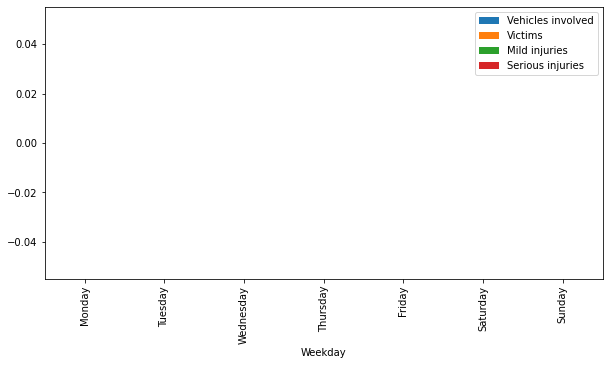

In [ ]:
layout = dict(title='Accidents by weekday',geo=dict(showframe=False))
weekday_data.plot.bar(figsize=(10,5),layout=layout)

In [ ]:
month_data = acc[['Month','Vehicles involved','Victims','Mild injuries','Serious injuries',]]
month_data = month_data.set_index('Month')
month_data = month_data.groupby(level=[0]).sum()
month_data = month_data.sort_index()
month_data = month_data.reindex(['January',
                                 'February',
                                 'March',
                                 'April',
                                 'May',
                                 'June',
                                 'July',
                                 'August',
                                 'September',
                                 'October',
                                 'November',
                                 'December'])

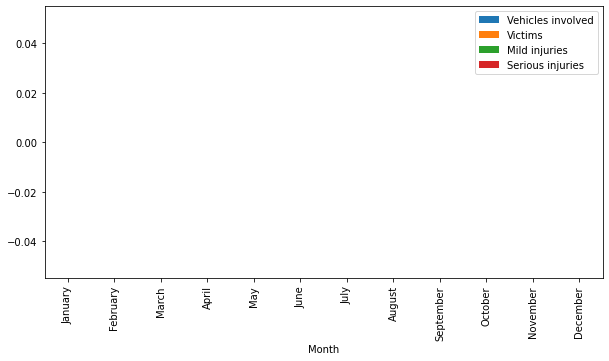

In [ ]:
layout = dict(title='Accidents by month',geo=dict(showframe=False))
month_data.plot.bar(figsize=(10,5),layout=layout)

In [ ]:
acc[['Vehicles involved','Victims']][:10]

,Vehicles involved,Victims
0,2,2
1,2,2
2,2,5
3,2,1
4,3,1
5,2,1
6,2,1
7,1,2
8,1,1
9,1,1


In [ ]:
dis_name=acc['District Name'].value_counts()
dis_name

Eixample               3029
Sant Martí             1336
Sarrià-Sant Gervasi    1104
Sants-Montjuïc         1104
Horta-Guinardó          743
Les Corts               726
Ciutat Vella            600
Sant Andreu             597
Nou Barris              542
Gràcia                  531
Unknown                  27
Name: District Name, dtype: int64

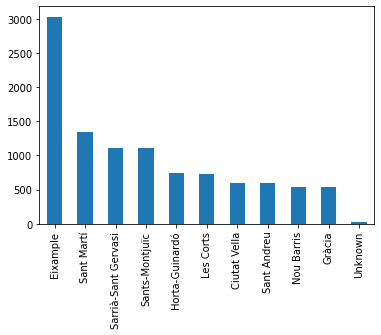

In [ ]:
dis_name.plot(kind='bar')

District Name
Ciutat Vella           AxesSubplot(0.125,0.125;0.775x0.755)
Eixample               AxesSubplot(0.125,0.125;0.775x0.755)
Gràcia                 AxesSubplot(0.125,0.125;0.775x0.755)
Horta-Guinardó         AxesSubplot(0.125,0.125;0.775x0.755)
Les Corts              AxesSubplot(0.125,0.125;0.775x0.755)
Nou Barris             AxesSubplot(0.125,0.125;0.775x0.755)
Sant Andreu            AxesSubplot(0.125,0.125;0.775x0.755)
Sant Martí             AxesSubplot(0.125,0.125;0.775x0.755)
Sants-Montjuïc         AxesSubplot(0.125,0.125;0.775x0.755)
Sarrià-Sant Gervasi    AxesSubplot(0.125,0.125;0.775x0.755)
Unknown                AxesSubplot(0.125,0.125;0.775x0.755)
Name: Victims, dtype: object

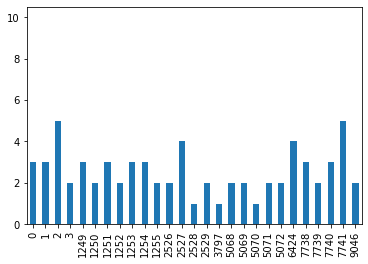

In [ ]:
et=acc.groupby(['District Name'])['Victims']
et.plot(kind='bar')

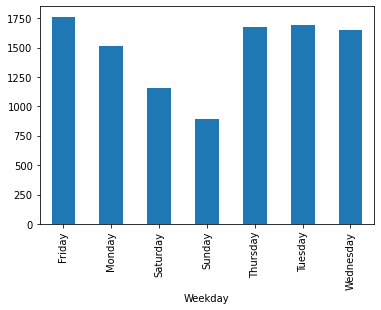

In [ ]:
day=acc.groupby(["Weekday"])["Victims"].count()
day.column=['Weekday', 'Victims']
day.plot(kind="bar")

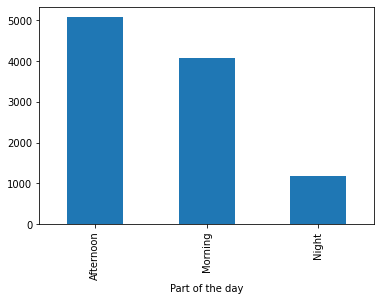

In [ ]:
day=acc.groupby(["Part of the day"])["Victims"].count()
day.column=['Part of the day', 'Victims']
day.plot(kind="bar")

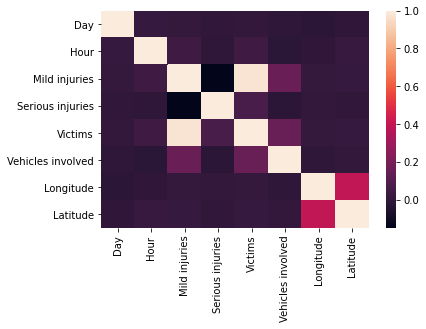

In [ ]:
sns.heatmap(acc.corr())